# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [43]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

male_height = male_df['Height']
male_height_mean = male_df['Height'].mean()
male_height_sd =  male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

female_height = female_df['Height']
female_height_mean = female_df['Height'].mean()
female_height_sd =  female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()



# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

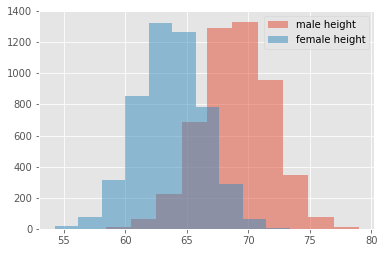

In [22]:
plt.hist(male_height, bins=10, alpha=0.5, label='male height')
plt.hist(female_height, bins=10, alpha=0.5, label='female height')
plt.legend(loc='upper right')
plt.show()

#### Record your observations - are these inline with your personal observations?
Near identical in shape.  Male height significantly higher

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

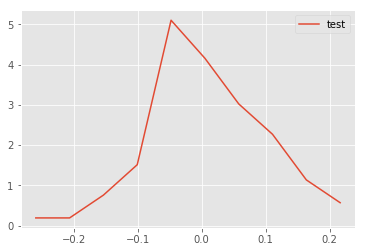

In [30]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx,pdfy



#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

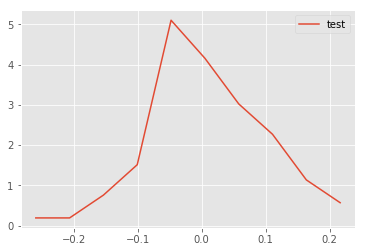

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


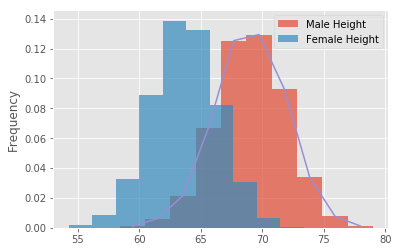

In [39]:
male_df.Height.plot.hist(bins=10, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins=10, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.show()

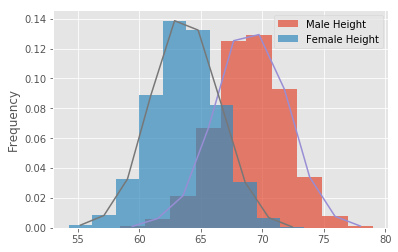

#### Repeat above exerice for male and female weights

/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


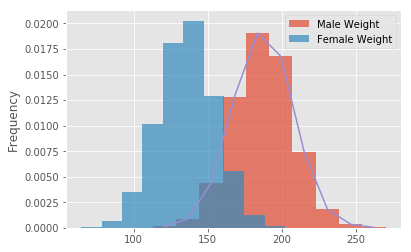

In [41]:
male_df.Weight.plot.hist(bins=10, normed = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins=10, normed = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
plt.show()

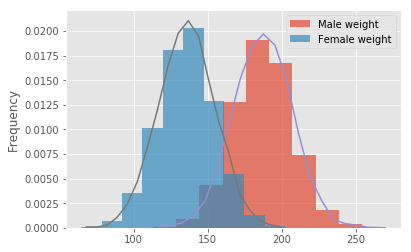

#### Write your observations in the cell below.

### Record your observations - are these inline with your personal observations?

#### Height
Most males are ~70 inches tall (13% of dataset). Tallest male is ~77 inches tall, shortest is ~58 inches.
Most females are ~62-63 inches tall (14% of dataset). Tallest female is ~71 inches tall, shortest is ~54 inches.

#### Weight
Most males are ~170-180 pounds (~1.85% of dataset). Heaviest male is ~285 pounds, lightest is 125 pounds.
Most females are ~140-148 pounds (~2.00% of dataset). Heaviest female is ~200 pounds, lightest is ~40 pounds.


### So whats the takeaway when comparing male and female heights and weights 

#### Height
The height of most males is 8 inches taller than that of most females. Tallest female height roughly equates to average male height.

#### Weight
The weight of most males is roughly 30 pounds heavier than that of most females

#### Repeat Above experiments in seaborn and compare with your results. 

/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


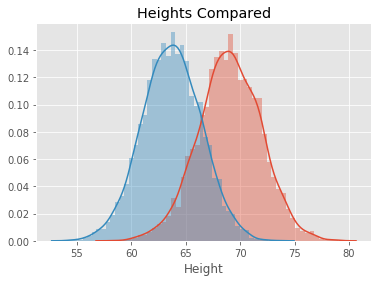

In [45]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Heights Compared')
plt.show()

/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


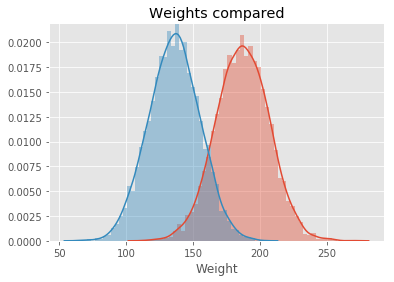

In [47]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Weights compared')
plt.show()

# Your comments on the two approaches here. 
## are they similar ? what makes them different if they are ?

Seaborn visualizations offers more granularity, gives better depiction of overall shape



## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.